# STA365: Applied Bayesian Inference HW 2
---
## Question 1
$P(\theta|x,n) \propto P(x|\theta,n)P(\theta)= \frac{1}{101} \prod_{i=1}^n\theta^{x_i}(1-\theta)^{1-x_i}\quad \forall \ \theta \epsilon \{ 0,\frac{1}{100},\ldots,\frac{99}{100},1 \} \propto Bin(n,\theta) \quad \forall \ \theta \epsilon \{ 0,\frac{1}{100},\ldots,\frac{99}{100},1 \}$


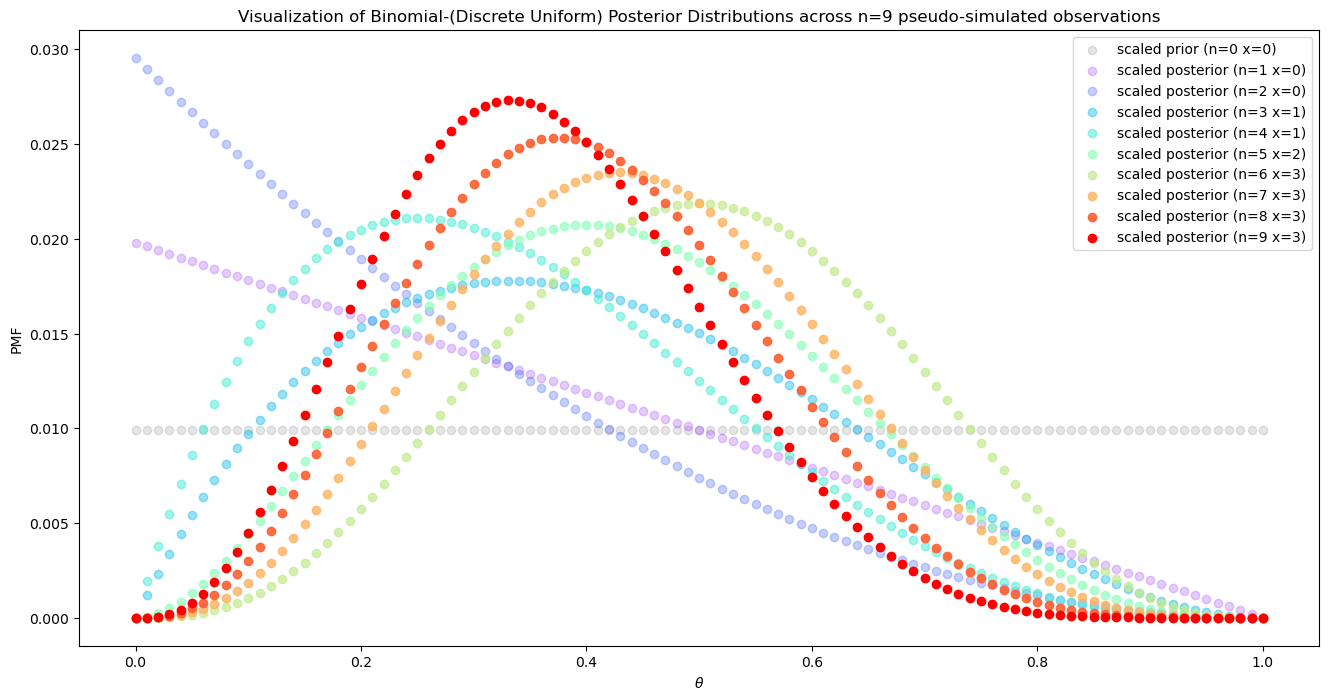

In [87]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; from matplotlib.pyplot import cm

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, alpha = 0.1, label="scaled prior (n="+str(n)+" x="+str(x)+")", color='k')


color = iter(cm.rainbow(np.linspace(0, 1, len(observations))))

for observation in observations:
    n += 1
    x += observation

    likelihood = lambda theta: stats.binom.pmf(x,n,theta)
    posterior = likelihood(parameter_domain)
    c = sum(posterior)
    plt.scatter(parameter_domain, posterior/c, alpha = (n+1)/10, color=next(color), label="scaled posterior (n="+str(n)+" x="+str(x)+")")
    
plt.title("Visualization of Binomial-(Discrete Uniform) Posterior Distributions across n=9 pseudo-simulated observations")
plt.xlabel('$\\theta$')
plt.ylabel('PMF')
plt.legend()
plt.show('png')

## Question 2

   $p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \sim Beta(x_j^{(t)}+\alpha_j, n_j^{(t)}-x_j^{(t)}+\beta_j)$

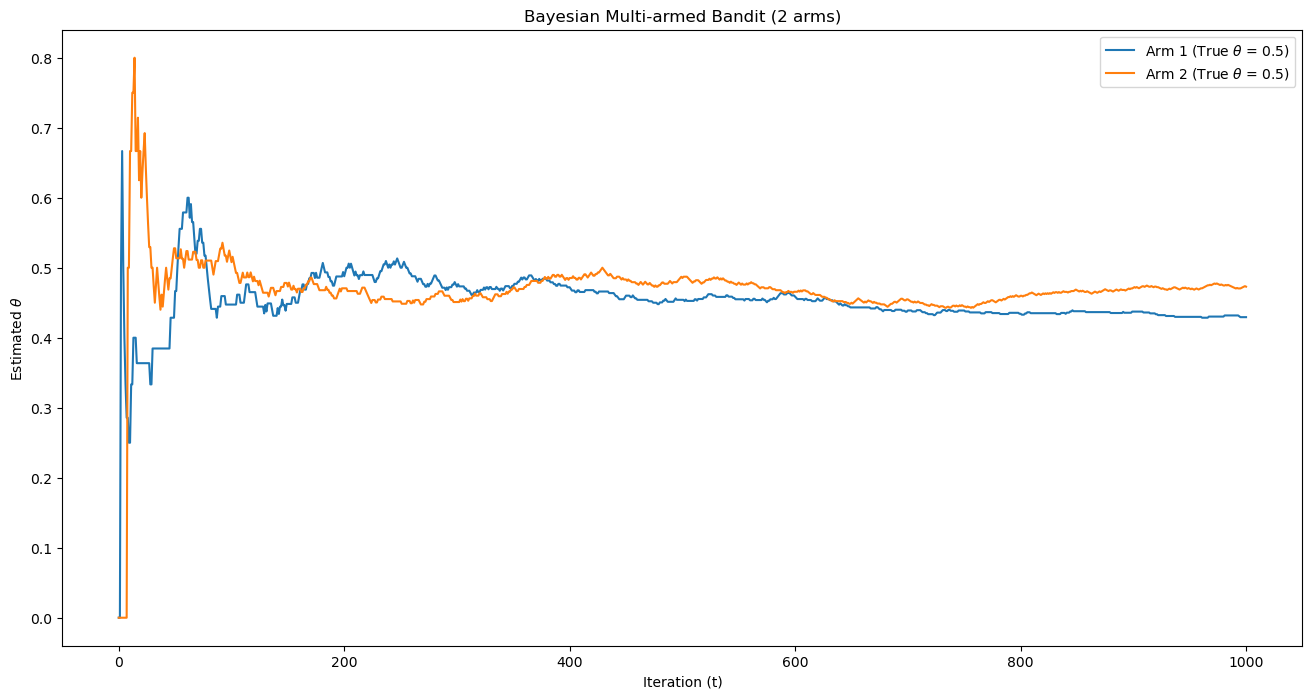

In [122]:
m = 1001
a = b = 1

Theta_true = np.array([0.5,0.5])
x = np.zeros(2)#x = [x1,x2]
n = np.zeros(2) #n = [n1,n2]
Theta_hat = np.zeros((m,2)) #theta = [theta1,theta2] 



for t in range(m):

    # Sample 1 theta for each arm
    theta_sample = stats.beta.rvs(x+a, n-x+b)
    
    # Play the arm with higher probability
    chosen_arm = np.argmax(theta_sample)

    x[chosen_arm] += stats.bernoulli.rvs(Theta_true[chosen_arm])
    n[chosen_arm] += 1

    Theta_hat[t] = x / np.where(n == 0, 1, n)

plt.figure(figsize=(16,8))
plt.plot(Theta_hat[:,0], label=f'Arm 1 (True $\\theta$ = {Theta_true[0]})')
plt.plot(Theta_hat[:,1], label=f'Arm 2 (True $\\theta$ = {Theta_true[1]})')
plt.xlabel('Iteration (t)')
plt.ylabel('Estimated $\\theta$')
plt.legend()
plt.title('Bayesian Multi-armed Bandit (2 arms)')
plt.show('png')

## Question 3
### Analysis 1: Beta-Binomial Model

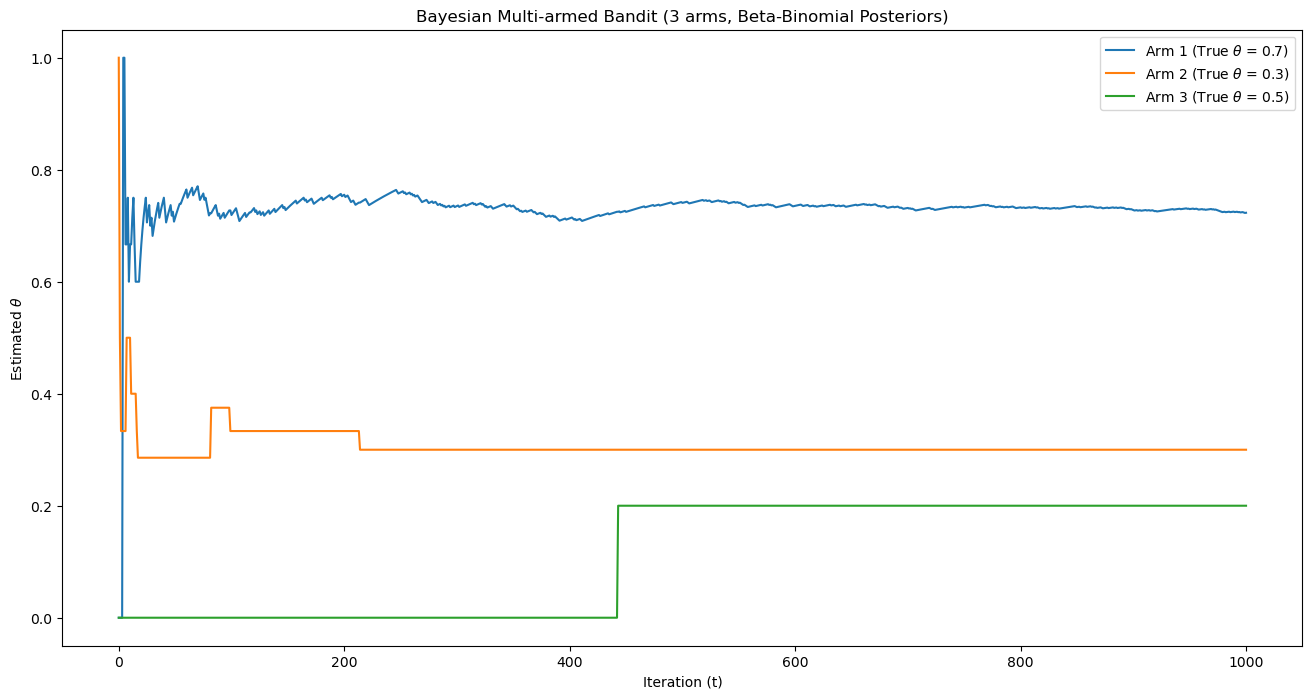

In [134]:
m = 1001
a = b = 1

n_arms = 3
Theta_true = np.array([0.7,0.3,0.5])
x = np.zeros(n_arms)#x = [x1,x2,x3]
n = np.zeros(n_arms) #n = [n1,n2,n3]
Theta_hat = np.zeros((m,n_arms)) #theta = [theta1,theta2,theta3] 



for t in range(m):

    # Sample 1 theta for each arm
    theta_sample = stats.beta.rvs(x+a, n-x+b)
    
    
    # Play the arm with highest probability
    chosen_arm = np.argmax(theta_sample)

    x[chosen_arm] += stats.bernoulli.rvs(Theta_true[chosen_arm])
    n[chosen_arm] += 1

    Theta_hat[t] = x / np.where(n == 0, 1, n)

plt.figure(figsize=(16,8))
for i in range(n_arms):
    plt.plot(Theta_hat[:,i], label=f'Arm {i+1} (True $\\theta$ = {Theta_true[i]})')

# plt.hlines(0,m)
plt.xlabel('Iteration (t)')
plt.ylabel('Estimated $\\theta$')
plt.legend()
plt.title('Bayesian Multi-armed Bandit (3 arms, Beta-Binomial Posteriors)')
plt.show('png')

### Analysis 2: Dirichlet-Multinomial Model

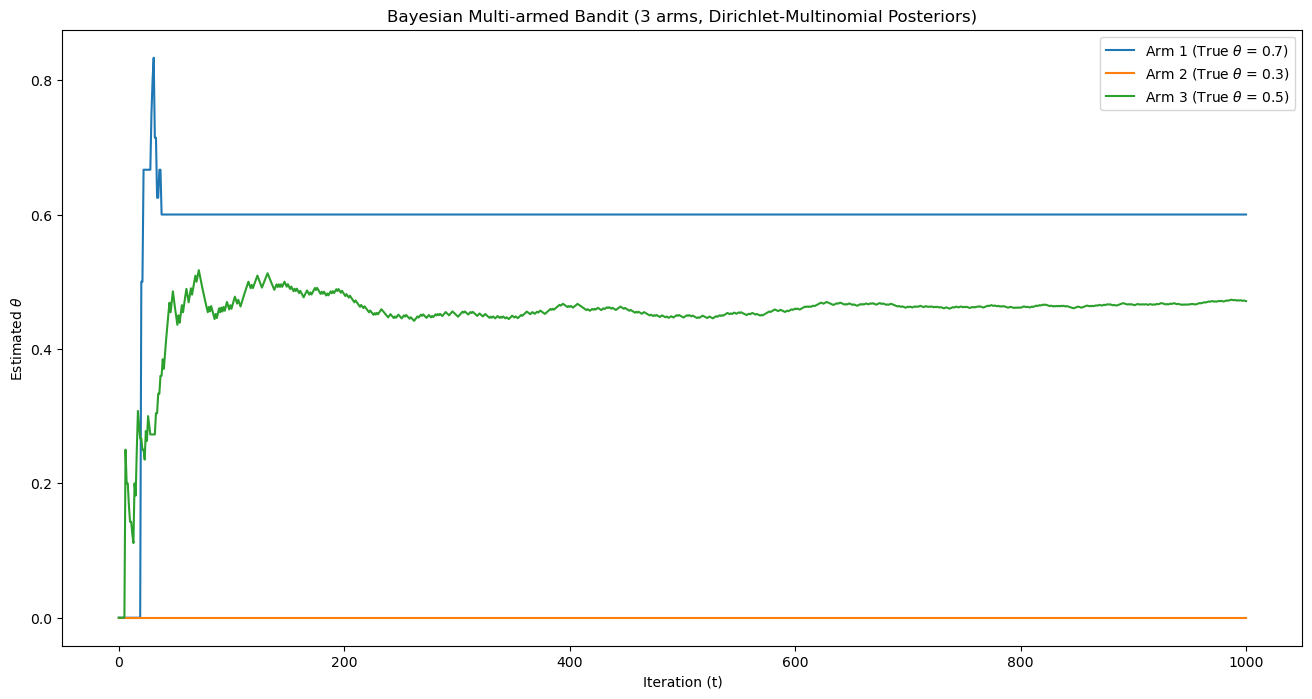

In [136]:
m = 1001
a = b = 1

n_arms = 3
Theta_true = np.array([0.7,0.3,0.5])
x = np.zeros(n_arms)#x = [x1,x2,x3]
n = np.zeros(n_arms) #n = [n1,n2,n3]
Theta_hat = np.zeros((m,n_arms)) #theta = [theta1,theta2,theta3] 



for t in range(m):

    # Sample 1 theta for each arm
    theta_sample = stats.dirichlet.rvs(a+x)
    
    
    # Play the arm with highest probability
    chosen_arm = np.argmax(theta_sample)

    x[chosen_arm] += stats.bernoulli.rvs(Theta_true[chosen_arm])
    n[chosen_arm] += 1

    Theta_hat[t] = x / np.where(n == 0, 1, n)

plt.figure(figsize=(16,8))
for i in range(n_arms):
    plt.plot(Theta_hat[:,i], label=f'Arm {i+1} (True $\\theta$ = {Theta_true[i]})')

# plt.hlines(0,m)
plt.xlabel('Iteration (t)')
plt.ylabel('Estimated $\\theta$')
plt.legend()
plt.title('Bayesian Multi-armed Bandit (3 arms, Dirichlet-Multinomial Posteriors)')
plt.show('png')

#### Comparison
If the arms are truly independent of one another, the Beta-Binomial model is probably favourable. Otherwise, the Dirichlet-Multinomial model can leverage information gained from using the shared Dirichlet prior. In practice, I imagine independence is likely to be violated, so I would lean towards the Dirichlet-Multinomial model.

#### AB testing example: 
- Comparing ad clicks across different ads (each ad being an arm)
- Balancing tradeoff between exploiting the same ad and exploring new ads that may get more clicks
- Steps:
    - Estimate initial probabilities of clicks for each ad (e.g. using Simple Monte Carlo Estimation)
    - Sample probability for each ad from posterior distribution of choice
    - Display the ad with the highest sampled probability
    - Record whether it got a click or not
    - Update posterior
    - Repeat for desired number of iterations (excluding estimation of initial probabilities)